In [1]:
import pandas as pd
import numpy as np

# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

In [2]:
#設定pandas 的顯示上限
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 讓pd.describe() 限制為2個小數
# pd.options.display.float_format = "{:.2f}".format

In [3]:
# 定義判別欄位型態的函數
def Col_Types(Data):
    Column_Types = Data.dtypes.to_frame().reset_index() # 判別每個欄位的型態 
    Column_Types.columns = ['ColumnName', 'Type']
    Column_Types.sort_values(by='Type', inplace=True) 
    return Column_Types

# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts(Data) : 
    missing = Data.isnull().sum() # 計算欄位中缺漏值的數量 
    missing = missing[missing>0]
    missing.sort_values(inplace=True) 
    
    Missing_Count = pd.DataFrame({'ColumnName': missing.index, 'MissingCount': missing.values}) # Convert Series to DataFrame
    Missing_Count['Percentage(%)'] = Missing_Count['MissingCount'].apply(lambda x:round(x/Data.shape[0]*100,2))
    return Missing_Count

In [68]:
#定義展示資料用函數
def Check_Data(Data):
    print(f'{Data.shape}')
    display(Missing_Counts(Data))
    display(Data.head())
    display(Col_Types(Data))

# read in data

In [4]:
df_login = pd.read_csv("login.csv")
df_purchase = pd.read_csv("purchase_detail.csv")
df_user_info = pd.read_csv("user_info.csv")
df_user_label_train = pd.read_csv("user_label_train.csv")

In [7]:
df_submission = pd.read_csv("submission.csv")

In [8]:
#繳交時要用這個
df_submission.head()

,userid
0,100352
1,306318
2,35311
3,346391
4,448953


In [10]:
df_submission[df_submission['userid'] == 103759]

,userid
18874,103759


In [12]:
lst = [df_login,df_purchase,df_user_info,df_user_label_train]
lst_name = ['df_login','df_purchase','df_user_info','df_user_label_train']

# df_test = pd.read_csv("")
for i in range(len(lst)):
    print(f'{lst_name[i],lst[i].shape}')
    display(lst[i].head())
    display(lst[i].describe())
    display(Missing_Counts(lst[i]))

# print(f'\ntest {df_test.shape}')b
# display(df_test.head())

('df_login', (50705586, 3))


,userid,date,login_times
0,161097,2020-07-29,2
1,243570,2020-07-29,2
2,355497,2020-07-29,4
3,167925,2020-07-29,1
4,504766,2020-07-29,1


,userid,login_times
count,5.070559e+07,5.070559e+07
mean,2.421087e+05,1.497016e+00
std,1.497889e+05,8.639956e-01
min,1.000000e+00,1.000000e+00
25%,1.108890e+05,1.000000e+00
50%,2.330730e+05,1.000000e+00
75%,3.688530e+05,2.000000e+00
max,5.216090e+05,4.100000e+01


,ColumnName,MissingCount,Percentage(%)


('df_purchase', (7792956, 5))


,userid,grass_date,order_count,total_amount,category_encoded
0,295790,2020-05-13,4,4,8
1,428982,2020-05-13,1,2,14
2,151685,2020-05-13,2,2,12
3,323635,2020-05-13,4,11,8
4,118610,2020-05-13,11,11,17


,userid,order_count,total_amount,category_encoded
count,7.792956e+06,7.792956e+06,7.792956e+06,7.792956e+06
mean,2.359381e+05,2.094395e+00,1.452133e+01,1.126059e+01
std,1.498749e+05,2.368780e+00,2.320008e+02,6.075114e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.038940e+05,1.000000e+00,1.000000e+00,6.000000e+00
50%,2.240100e+05,1.000000e+00,2.000000e+00,9.000000e+00
75%,3.616850e+05,2.000000e+00,4.000000e+00,1.600000e+01
max,5.216090e+05,2.740000e+02,1.000000e+05,2.300000e+01


,ColumnName,MissingCount,Percentage(%)


('df_user_info', (502157, 5))


,userid,gender,is_seller,birth_year,enroll_time
0,1,2.0,1,1985.0,2015-05-27
1,2,1.0,1,1980.0,2015-05-27
2,3,2.0,1,2014.0,2015-05-27
3,4,1.0,1,1978.0,2015-05-27
4,5,1.0,1,1978.0,2015-05-27


,userid,gender,is_seller,birth_year
count,502157.000000,502122.000000,502157.000000,277496.000000
mean,257572.233329,1.627180,0.366168,1988.371458
std,150078.815608,0.483555,0.481757,10.586304
min,1.000000,1.000000,0.000000,1901.000000
25%,127525.000000,1.000000,0.000000,1982.000000
50%,256080.000000,2.000000,0.000000,1990.000000
75%,386841.000000,2.000000,1.000000,1996.000000
max,521609.000000,2.000000,1.000000,2038.000000


,ColumnName,MissingCount,Percentage(%)
0,gender,35,0.01
1,birth_year,224661,44.74


('df_user_label_train', (426832, 2))


,userid,label
0,243381,0
1,150139,1
2,305902,1
3,159981,0
4,490632,0


,userid,label
count,426832.000000,426832.000000
mean,257546.760130,0.341793
std,150092.330725,0.474311
min,1.000000,0.000000
25%,127404.750000,0.000000
50%,256065.000000,0.000000
75%,386842.250000,1.000000
max,521609.000000,1.000000


,ColumnName,MissingCount,Percentage(%)


## 確認主檔: df_user_info

In [70]:
#串label結果上去
df_user = df_user_info.merge(df_user_label_train,how = 'left', on = 'userid')
df_user.head()

,userid,gender,is_seller,birth_year,enroll_time,label
0,1,2.0,1,1985.0,2015-05-27,0.0
1,2,1.0,1,1980.0,2015-05-27,0.0
2,3,2.0,1,2014.0,2015-05-27,0.0
3,4,1.0,1,1978.0,2015-05-27,0.0
4,5,1.0,1,1978.0,2015-05-27,1.0


In [71]:
#串submission_id上去
df_submission.loc[:,'submit_ind'] = 1
df_submission.head()

,userid,submit_ind
0,100352,1
1,306318,1
2,35311,1
3,346391,1
4,448953,1


In [72]:
df_user = df_user.merge(df_submission,how = 'left',on = 'userid')
df_user.head()

,userid,gender,is_seller,birth_year,enroll_time,label,submit_ind
0,1,2.0,1,1985.0,2015-05-27,0.0,NaN
1,2,1.0,1,1980.0,2015-05-27,0.0,NaN
2,3,2.0,1,2014.0,2015-05-27,0.0,NaN
3,4,1.0,1,1978.0,2015-05-27,0.0,NaN
4,5,1.0,1,1978.0,2015-05-27,1.0,NaN


In [73]:
len(df_user[df_user['submit_ind'] == 1])

75325

In [69]:
Check_Data(df_user)

(502157, 7)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,userid,gender,is_seller,birth_year,enroll_time,label,submit_ind
0,1,2.0,1,1985.0,2015-05-27,0.0,NaN
1,2,1.0,1,1980.0,2015-05-27,0.0,NaN
2,3,2.0,1,2014.0,2015-05-27,0.0,NaN
3,4,1.0,1,1978.0,2015-05-27,0.0,NaN
4,5,1.0,1,1978.0,2015-05-27,1.0,NaN


,ColumnName,Type
0,userid,int64
2,is_seller,int64
1,gender,float64
3,birth_year,float64
5,label,float64
6,submit_ind,float64
4,enroll_time,object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F69117320>]],
      dtype=object)

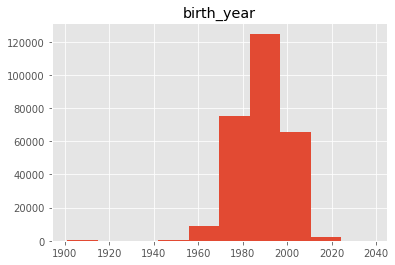

In [74]:
df_user.hist('birth_year')

In [75]:
len(df_user.loc[df_user['birth_year'] >= 2020,'birth_year']), len(df_user.loc[df_user['birth_year'] == 1970,'birth_year'])

(833, 7559)

# 處理null值
birth_year


In [76]:
df_user['birth_year'].mode()

0    2000.0
dtype: float64

In [78]:
df_user.loc[df_user['birth_year'] >= 2020,'birth_year'] = 2000
df_user.loc[df_user['birth_year'] == 1970,'birth_year'] = 2000
df_user['birth_year'] = df_user['birth_year'].fillna(2000)

In [79]:
Check_Data(df_user)

(502157, 7)


,ColumnName,MissingCount,Percentage(%)
0,gender,35,0.01
1,label,75325,15.00
2,submit_ind,426832,85.00


,userid,gender,is_seller,birth_year,enroll_time,label,submit_ind
0,1,2.0,1,1985.0,2015-05-27,0.0,NaN
1,2,1.0,1,1980.0,2015-05-27,0.0,NaN
2,3,2.0,1,2014.0,2015-05-27,0.0,NaN
3,4,1.0,1,1978.0,2015-05-27,0.0,NaN
4,5,1.0,1,1978.0,2015-05-27,1.0,NaN


,ColumnName,Type
0,userid,int64
2,is_seller,int64
1,gender,float64
3,birth_year,float64
5,label,float64
6,submit_ind,float64
4,enroll_time,object


# 處理null值
gender

In [80]:
df_user['gender'] = df_user['gender'].fillna(2)

In [82]:
Check_Data(df_user)

(502157, 7)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,userid,gender,is_seller,birth_year,enroll_time,label,submit_ind
0,1,2.0,1,1985.0,2015-05-27,0.0,NaN
1,2,1.0,1,1980.0,2015-05-27,0.0,NaN
2,3,2.0,1,2014.0,2015-05-27,0.0,NaN
3,4,1.0,1,1978.0,2015-05-27,0.0,NaN
4,5,1.0,1,1978.0,2015-05-27,1.0,NaN


,ColumnName,Type
0,userid,int64
2,is_seller,int64
1,gender,float64
3,birth_year,float64
5,label,float64
6,submit_ind,float64
4,enroll_time,object


# reindex by userid

In [92]:
df_user_reindex = df_user.set_index('userid')
Check_Data(df_user_reindex)

(502157, 8)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,gender,is_seller,birth_year,enroll_time,label,submit_ind,age,gender_encode
userid,,,,,,,,
1,2.0,1,1985.0,2015-05-27,0.0,NaN,35.0,1.0
2,1.0,1,1980.0,2015-05-27,0.0,NaN,40.0,0.0
3,2.0,1,2014.0,2015-05-27,0.0,NaN,6.0,1.0
4,1.0,1,1978.0,2015-05-27,0.0,NaN,42.0,0.0
5,1.0,1,1978.0,2015-05-27,1.0,NaN,42.0,0.0


,ColumnName,Type
1,is_seller,int64
0,gender,float64
2,birth_year,float64
4,label,float64
5,submit_ind,float64
6,age,float64
7,gender_encode,float64
3,enroll_time,object


In [93]:
Check_Data(df_user)

(502157, 9)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,userid,gender,is_seller,birth_year,enroll_time,label,submit_ind,age,gender_encode
0,1,2.0,1,1985.0,2015-05-27,0.0,NaN,35.0,1.0
1,2,1.0,1,1980.0,2015-05-27,0.0,NaN,40.0,0.0
2,3,2.0,1,2014.0,2015-05-27,0.0,NaN,6.0,1.0
3,4,1.0,1,1978.0,2015-05-27,0.0,NaN,42.0,0.0
4,5,1.0,1,1978.0,2015-05-27,1.0,NaN,42.0,0.0


,ColumnName,Type
0,userid,int64
2,is_seller,int64
1,gender,float64
3,birth_year,float64
5,label,float64
6,submit_ind,float64
7,age,float64
8,gender_encode,float64
4,enroll_time,object


# col 轉換
### new data set: df_user_trans
df_user: birth_year 2 age

df_user: gender 2 gender_encode

In [94]:
df_user_trans = df_user_reindex

In [95]:
df_user_trans.loc[:, 'age'] = 2020 - df_user_trans['birth_year']
Check_Data(df_user_trans)

(502157, 8)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,gender,is_seller,birth_year,enroll_time,label,submit_ind,age,gender_encode
userid,,,,,,,,
1,2.0,1,1985.0,2015-05-27,0.0,NaN,35.0,1.0
2,1.0,1,1980.0,2015-05-27,0.0,NaN,40.0,0.0
3,2.0,1,2014.0,2015-05-27,0.0,NaN,6.0,1.0
4,1.0,1,1978.0,2015-05-27,0.0,NaN,42.0,0.0
5,1.0,1,1978.0,2015-05-27,1.0,NaN,42.0,0.0


,ColumnName,Type
1,is_seller,int64
0,gender,float64
2,birth_year,float64
4,label,float64
5,submit_ind,float64
6,age,float64
7,gender_encode,float64
3,enroll_time,object


In [96]:
# 將gender做變換 F= 1, M =0

df_user_trans.loc[:,'gender_encode'] = np.nan
df_user_trans.loc[df_user_trans['gender'] == 2, 'gender_encode'] = 1
df_user_trans.loc[df_user_trans['gender'] == 1, 'gender_encode'] = 0

Check_Data(df_user_trans)

(502157, 8)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,gender,is_seller,birth_year,enroll_time,label,submit_ind,age,gender_encode
userid,,,,,,,,
1,2.0,1,1985.0,2015-05-27,0.0,NaN,35.0,1.0
2,1.0,1,1980.0,2015-05-27,0.0,NaN,40.0,0.0
3,2.0,1,2014.0,2015-05-27,0.0,NaN,6.0,1.0
4,1.0,1,1978.0,2015-05-27,0.0,NaN,42.0,0.0
5,1.0,1,1978.0,2015-05-27,1.0,NaN,42.0,0.0


,ColumnName,Type
1,is_seller,int64
0,gender,float64
2,birth_year,float64
4,label,float64
5,submit_ind,float64
6,age,float64
7,gender_encode,float64
3,enroll_time,object


In [99]:
display(df_user_trans.pivot_table(index = 'enroll_time',values = 'is_seller', aggfunc = 'count'))

,is_seller
enroll_time,
2015-05-27,17
2015-06-02,3
2015-06-03,17
2015-06-04,11
2015-06-05,1
2015-06-06,7
2015-06-07,2
2015-06-08,9
2015-06-09,3


# drop transformed columns
'gender','birth_year','enroll_time'

In [100]:
df_user_trans_drop = df_user_trans.drop(['gender','birth_year','enroll_time'],axis = 1)
Check_Data(df_user_trans_drop)

(502157, 5)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,is_seller,label,submit_ind,age,gender_encode
userid,,,,,
1,1,0.0,NaN,35.0,1.0
2,1,0.0,NaN,40.0,0.0
3,1,0.0,NaN,6.0,1.0
4,1,0.0,NaN,42.0,0.0
5,1,1.0,NaN,42.0,0.0


,ColumnName,Type
0,is_seller,int64
1,label,float64
2,submit_ind,float64
3,age,float64
4,gender_encode,float64


# 處理purchase 檔案

In [102]:
Check_Data(df_purchase)

(7792956, 5)


,ColumnName,MissingCount,Percentage(%)


,userid,grass_date,order_count,total_amount,category_encoded
0,295790,2020-05-13,4,4,8
1,428982,2020-05-13,1,2,14
2,151685,2020-05-13,2,2,12
3,323635,2020-05-13,4,11,8
4,118610,2020-05-13,11,11,17


,ColumnName,Type
0,userid,int64
2,order_count,int64
3,total_amount,int64
4,category_encoded,int64
1,grass_date,object


In [106]:
purchase_grassdate_byuser = df_purchase.groupby('userid').grass_date.count()
print(purchase_grassdate_byuser.shape)
display(purchase_grassdate_byuser.head())


(502157,)


userid
1    10
2    18
3     7
4    35
5    65
Name: grass_date, dtype: int64

In [107]:
purchase_order_count_byuser = df_purchase.groupby('userid').order_count.sum()
print(purchase_order_count_byuser.shape)
display(purchase_order_count_byuser.head())


(502157,)


userid
1    30
2    25
3    14
4    54
5    86
Name: order_count, dtype: int64

In [108]:
purchase_total_amount_byuser = df_purchase.groupby('userid').total_amount.sum()
print(purchase_total_amount_byuser.shape)
display(purchase_total_amount_byuser.head())


(502157,)


userid
1     246
2      59
3      14
4      82
5    2734
Name: total_amount, dtype: int64

In [110]:
#設定函式將類別型變數col更換成one-hot-encoding
def one_hot(Data,col):
    one_hot = pd.get_dummies(Data[col])
    Data_onehot = Data.drop(col,axis = 1)
    Data = Data_onehot.join(one_hot)
    return Data

In [111]:
purchase_catedummy = one_hot(df_purchase,'category_encoded')
purchase_catedummy.head()

,userid,grass_date,order_count,total_amount,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,295790,2020-05-13,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,428982,2020-05-13,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,151685,2020-05-13,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,323635,2020-05-13,4,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,118610,2020-05-13,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
purchase_catedummy_group = purchase_catedummy[['userid',2,8,10,19,21,23]]
Check_Data(purchase_catedummy_group)

(7792956, 7)


,ColumnName,MissingCount,Percentage(%)


,userid,2,8,10,19,21,23
0,295790,0,1,0,0,0,0
1,428982,0,0,0,0,0,0
2,151685,0,0,0,0,0,0
3,323635,0,1,0,0,0,0
4,118610,0,0,0,0,0,0


,ColumnName,Type
1,2,uint8
2,8,uint8
3,10,uint8
4,19,uint8
5,21,uint8
6,23,uint8
0,userid,int64


In [115]:
purchase_catedummy_group = purchase_catedummy_group.groupby('userid').sum()
Check_Data(purchase_catedummy_group)

(502157, 6)


,ColumnName,MissingCount,Percentage(%)


,2,8,10,19,21,23
userid,,,,,,
1,0,1,0,0,0,0
2,2,9,0,0,0,0
3,0,3,0,1,0,0
4,0,9,1,0,0,2
5,1,9,8,0,0,0


,ColumnName,Type
0,2,uint8
1,8,uint8
2,10,uint8
3,19,uint8
4,21,uint8
5,23,uint8


## merge data set 


In [116]:
df_user_n_purchase = df_user_trans_drop.merge(purchase_grassdate_byuser, on = 'userid')
df_user_n_purchase = df_user_n_purchase.merge(purchase_order_count_byuser, on = 'userid')
df_user_n_purchase = df_user_n_purchase.merge(purchase_total_amount_byuser, on = 'userid')
df_user_n_purchase = df_user_n_purchase.merge(purchase_catedummy_group, on = 'userid')

Check_Data(df_user_n_purchase)

(502157, 14)


,ColumnName,MissingCount,Percentage(%)
0,label,75325,15.0
1,submit_ind,426832,85.0


,is_seller,label,submit_ind,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
userid,,,,,,,,,,,,,,
1,1,0.0,NaN,35.0,1.0,10,30,246,0,1,0,0,0,0
2,1,0.0,NaN,40.0,0.0,18,25,59,2,9,0,0,0,0
3,1,0.0,NaN,6.0,1.0,7,14,14,0,3,0,1,0,0
4,1,0.0,NaN,42.0,0.0,35,54,82,0,9,1,0,0,2
5,1,1.0,NaN,42.0,0.0,65,86,2734,1,9,8,0,0,0


,ColumnName,Type
8,2,uint8
9,8,uint8
10,10,uint8
11,19,uint8
12,21,uint8
13,23,uint8
0,is_seller,int64
5,grass_date,int64
6,order_count,int64
7,total_amount,int64


In [118]:
df_user_n_purchase.to_csv('df_user_n_purchase_20201123_1.csv',index = True)

# prepare dataset for train model

In [133]:
df_train = df_user_n_purchase[(df_user_n_purchase['label'].notna())]
df_train = df_train.drop('submit_ind',axis = 1)
Check_Data(df_train)

(426832, 13)


,ColumnName,MissingCount,Percentage(%)


,is_seller,label,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
userid,,,,,,,,,,,,,
1,1,0.0,35.0,1.0,10,30,246,0,1,0,0,0,0
2,1,0.0,40.0,0.0,18,25,59,2,9,0,0,0,0
3,1,0.0,6.0,1.0,7,14,14,0,3,0,1,0,0
4,1,0.0,42.0,0.0,35,54,82,0,9,1,0,0,2
5,1,1.0,42.0,0.0,65,86,2734,1,9,8,0,0,0


,ColumnName,Type
7,2,uint8
8,8,uint8
9,10,uint8
10,19,uint8
11,21,uint8
12,23,uint8
0,is_seller,int64
4,grass_date,int64
5,order_count,int64
6,total_amount,int64


## train model

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [135]:
x=df_train.drop(['label'], axis = 1)
y=df_train[['label']]
Check_Data(x)
Check_Data(y)

(426832, 12)


,ColumnName,MissingCount,Percentage(%)


,is_seller,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
userid,,,,,,,,,,,,
1,1,35.0,1.0,10,30,246,0,1,0,0,0,0
2,1,40.0,0.0,18,25,59,2,9,0,0,0,0
3,1,6.0,1.0,7,14,14,0,3,0,1,0,0
4,1,42.0,0.0,35,54,82,0,9,1,0,0,2
5,1,42.0,0.0,65,86,2734,1,9,8,0,0,0


,ColumnName,Type
6,2,uint8
7,8,uint8
8,10,uint8
9,19,uint8
10,21,uint8
11,23,uint8
0,is_seller,int64
3,grass_date,int64
4,order_count,int64
5,total_amount,int64


(426832, 1)


,ColumnName,MissingCount,Percentage(%)


,label
userid,
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0


,ColumnName,Type
0,label,float64


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20200921) #random_state 種子值

display(x_train.head())
display(y_train.head())

,is_seller,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
userid,,,,,,,,,,,,
215281,0,33.0,1.0,3,4,7,0,1,0,0,0,0
493196,0,14.0,1.0,10,55,65,0,1,1,0,0,0
80937,0,21.0,1.0,9,14,19,0,0,0,0,0,3
365178,0,20.0,1.0,10,20,87,2,4,0,0,1,0
200831,1,18.0,1.0,20,47,70,1,4,0,0,2,0


,label
userid,
215281,0.0
493196,0.0
80937,1.0
365178,1.0
200831,0.0


In [79]:
# x_train_resetindex = x_train.reset_index()
# x_train_resetindex

,index,userid,is_seller,new_gender,age,grass_date,order_count,total_amount,2,8,10,19,21,23
0,175388,367768,0,1.0,39.0,16,42,167,1,0,0,0,4,4
1,65034,116357,1,0.0,35.0,28,36,49,0,4,0,0,0,0
2,130121,257009,1,0.0,98.0,63,112,154,5,7,1,1,1,5
3,57151,101168,1,1.0,27.0,43,85,145,2,6,1,2,2,5
4,66333,119033,1,0.0,57.0,29,35,58,0,12,0,0,0,0
5,31642,54627,1,1.0,46.0,11,16,42,0,4,0,0,0,0
6,61208,108876,0,1.0,36.0,6,20,48,0,1,0,0,0,3
7,158408,325576,1,1.0,22.0,7,15,26,1,1,1,0,0,1
8,161841,334049,0,0.0,16.0,4,4,4,0,2,0,0,0,0
9,50395,88458,1,1.0,28.0,11,18,64,0,2,0,0,0,1


In [137]:
#訓練資料分類效果(3個參數)
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\annyu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\annyu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
# 計算準確率
preds = lr.predict(x_test)
accuracy = lr.score(x_test, y_test)
print(accuracy)

0.6907848496680984


# 製作submit dataset

In [140]:
df_submit = df_user_n_purchase[(df_user_n_purchase['submit_ind'].notna())]
df_submit = df_submit.drop(['submit_ind','label'],axis = 1)
Check_Data(df_submit)

(75325, 12)


,ColumnName,MissingCount,Percentage(%)


,is_seller,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
userid,,,,,,,,,,,,
8,1,20.0,1.0,9,10,19,0,2,0,0,0,0
18,1,37.0,1.0,27,43,53,2,5,5,0,1,5
19,1,41.0,1.0,36,53,645,0,20,0,0,0,0
30,0,33.0,0.0,5,5,5,0,4,0,0,0,0
32,0,20.0,0.0,7,13,17,0,2,0,0,0,0


,ColumnName,Type
6,2,uint8
7,8,uint8
8,10,uint8
9,19,uint8
10,21,uint8
11,23,uint8
0,is_seller,int64
3,grass_date,int64
4,order_count,int64
5,total_amount,int64


In [141]:
submit_score =  lr.predict_proba(df_submit)
submit_score

array([[0.72618038, 0.27381962],
       [0.53090606, 0.46909394],
       [0.41084506, 0.58915494],
       ...,
       [0.14741018, 0.85258982],
       [0.78244972, 0.21755028],
       [0.79359574, 0.20640426]])

In [144]:
submit_ans = pd.DataFrame(submit_score[:,1])
Check_Data(submit_ans)

(75325, 1)


,ColumnName,MissingCount,Percentage(%)


,0
0,0.273820
1,0.469094
2,0.589155
3,0.259156
4,0.273364


,ColumnName,Type
0,0,float64


In [147]:
df_submit_reindex = df_submit.reset_index()
Check_Data(df_submit_reindex)

(75325, 13)


,ColumnName,MissingCount,Percentage(%)


,userid,is_seller,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23
0,8,1,20.0,1.0,9,10,19,0,2,0,0,0,0
1,18,1,37.0,1.0,27,43,53,2,5,5,0,1,5
2,19,1,41.0,1.0,36,53,645,0,20,0,0,0,0
3,30,0,33.0,0.0,5,5,5,0,4,0,0,0,0
4,32,0,20.0,0.0,7,13,17,0,2,0,0,0,0


,ColumnName,Type
7,2,uint8
8,8,uint8
9,10,uint8
10,19,uint8
11,21,uint8
12,23,uint8
0,userid,int64
1,is_seller,int64
4,grass_date,int64
5,order_count,int64


In [154]:
df_submit_n_ans = pd.concat([df_submit_reindex,submit_ans],axis = 1)
df_submit_n_ans

,userid,is_seller,age,gender_encode,grass_date,order_count,total_amount,2,8,10,19,21,23,0
0,8,1,20.0,1.0,9,10,19,0,2,0,0,0,0,0.273820
1,18,1,37.0,1.0,27,43,53,2,5,5,0,1,5,0.469094
2,19,1,41.0,1.0,36,53,645,0,20,0,0,0,0,0.589155
3,30,0,33.0,0.0,5,5,5,0,4,0,0,0,0,0.259156
4,32,0,20.0,0.0,7,13,17,0,2,0,0,0,0,0.273364
5,40,1,34.0,0.0,17,31,54,0,4,0,0,0,2,0.430824
6,41,0,33.0,0.0,12,23,39,2,6,0,0,0,0,0.334617
7,42,0,20.0,0.0,4,4,9,0,0,0,0,0,0,0.250283
8,54,1,26.0,0.0,28,87,211,0,5,0,0,0,0,0.535994
9,61,1,34.0,1.0,12,20,41,1,0,0,0,0,0,0.320660


In [158]:
submit = df_submit_n_ans[['userid',0]]
submit = submit.rename({0:'label'},axis = 1)
Check_Data(submit)

(75325, 2)


,ColumnName,MissingCount,Percentage(%)


,userid,label
0,8,0.273820
1,18,0.469094
2,19,0.589155
3,30,0.259156
4,32,0.273364


,ColumnName,Type
0,userid,int64
1,label,float64


In [159]:
submit.to_csv('submit_20201123.csv',index = False)